In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import pandas as pd
import seaborn as sns
import numpy as np
import ast
from wordcloud import WordCloud

import CleanTweets as ct

[nltk_data] Downloading package stopwords to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import plotly.express as px

In [73]:
def draw_bubble(df, x_name, y_name, name, size_,  weight = 60, 

                height=1200, marker_size=None, xaxis= "influencer"

               , yaxis = 'retweet'):

    """df: output of agg_multi_col_bubbles"""

    """ 

    Weighted net sentiment per topic (Engagement) vs net sentiment per topic.

    Size of bubble is a measure of tweet contribution. 

    

    

    Parameters:

    df

    x_name='net_sent',  y_name='w_sent' 

    net_sentiment(float): Net sentiment per tweet (Previously calculated)

    weighted_sentiment(float): Weighted sentiment per tweet (based on influencer score and retweet count,

                                                             determined by agg_multi_col_bubbles) 

                                                             

 

    Returns:

    Bubble (scatter) graph showing weighted net sentiment (Possible Engagement) vs Net Sentiment per topic.    

    """

  

    fig = px.scatter(df, x=x_name, y=y_name,size=size_,

        hover_name=name, size_max=weight, width=1000, height=height,

                     color_discrete_sequence=px.colors.qualitative.Plotly +

                                             px.colors.qualitative.D3+

                                             px.colors.qualitative.G10+

                                             px.colors.qualitative.T10+

                                             px.colors.qualitative.Pastel,

        labels={

                     x_name: xaxis,

                     y_name: yaxis,

                 },log_y=False)

    #fig.update_layout(showlegend=False)

    

    fig.update_layout(legend=dict(

        orientation="h",

        yanchor="bottom",

        y=1.02,

        xanchor="right",

        x=1

    ))

    fig.update_layout(

                yaxis=dict(

                    title=yaxis,

                    titlefont_size=16,

                    tickfont_size=14,

                ))

    if marker_size is not None:

        fig.update_traces(mode='markers', marker_size=marker_size)

    else:

        fig.update_yaxes(showticklabels=False)

        fig.update_layout(legend_title_text='Cluster')

    fig.update_xaxes()
    
    fig.write_html("../viz_images/topInfluencers_tendaguru.html")
    

    fig.show()

In [8]:
tendaguru = pd.read_json('../data/tendaguru.json', lines=True)

In [9]:
tendaguru_clean = ct.clean_tweets(tendaguru,content='content',col_name='clean_tweet',
                general_clean=True,lemma=True,stem=False,remove_tag=True,remove_mention=True,
                remove_emoji=False, remove_stopword=True,min_length=2, untokenized_return=True
                )

time taken to clean tweets: 6.54787802696228s. Use the [clean_tweet] column to perform your analysis/modeling on


In [6]:
# tendaguru_clean.to_csv('tendaguru_clean.csv')

In [3]:
# tendaguru_clean = pd.read_csv('../data/tendaguru_clean.csv')

## Time/volume tweets - line chart

In [13]:
tendaguru_clean.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'clean_tweet'],
      dtype='object')

In [14]:
tendaguru_clean.date

0     2021-07-06 09:12:17+00:00
1     2021-07-05 20:04:59+00:00
2     2021-07-04 08:37:17+00:00
3     2021-07-03 06:44:43+00:00
4     2021-07-02 17:21:46+00:00
                 ...           
336   2016-04-07 14:07:31+00:00
337   2016-04-04 17:22:35+00:00
338   2016-03-29 07:50:52+00:00
339   2016-03-29 07:45:18+00:00
340   2016-02-04 07:45:54+00:00
Name: date, Length: 341, dtype: datetime64[ns, UTC]

In [15]:
tendaguru_clean.date[0].year

2021

In [16]:
tendaguru_clean['year'] = tendaguru_clean['date'].apply(lambda x: x.year)

In [17]:
tendaguru_clean['year'].sample(5)

131    2020
331    2016
129    2020
92     2020
212    2018
Name: year, dtype: int64

## Time/volume tweets - line chart

In [18]:
tweetByYear = tendaguru_clean.groupby('year').count().reset_index()

In [19]:
tweetByYear

,year,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet
0,2016,27,27,27,27,27,27,27,27,27,...,0,1,4,4,6,0,0,12,0,27
1,2017,52,52,52,52,52,52,52,52,52,...,0,1,7,7,21,0,0,25,0,52
2,2018,68,68,68,68,68,68,68,68,68,...,0,5,12,12,14,1,1,30,0,68
3,2019,53,53,53,53,53,53,53,53,53,...,0,4,10,10,23,3,3,18,0,53
4,2020,65,65,65,65,65,65,65,65,65,...,0,4,25,25,27,2,2,15,0,65
5,2021,76,76,76,76,76,76,76,76,76,...,0,2,53,53,40,0,0,6,0,76


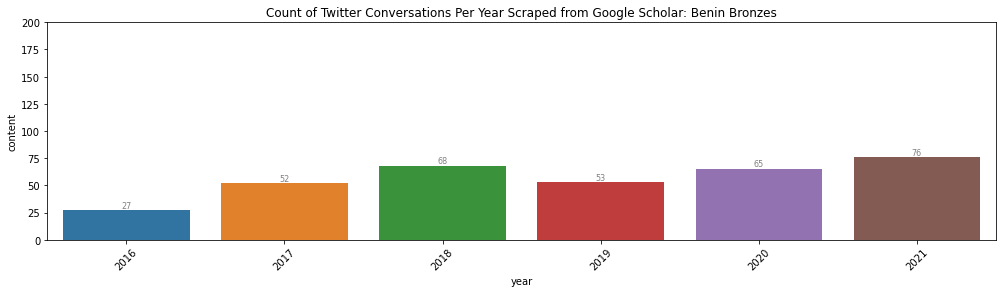

In [22]:
plt.figure(figsize=[17,4])
plt.xticks(rotation=45)
plt.title('Count of Twitter Conversations Per Year Scraped from Google Scholar: Benin Bronzes')
g = sns.barplot(data=tweetByYear, 
             x="year", 
             y="content") 
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='gray', xytext=(0, 5),
                textcoords='offset points')
_ = ax.set_ylim(0,200) #To make space for the annotations62222
plt.savefig('TwitterConvCount_tendaguru')

## Keywords - Network diagram

In [23]:
tendaguru_clean[tendaguru_clean.clean_tweet == None]

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet,year


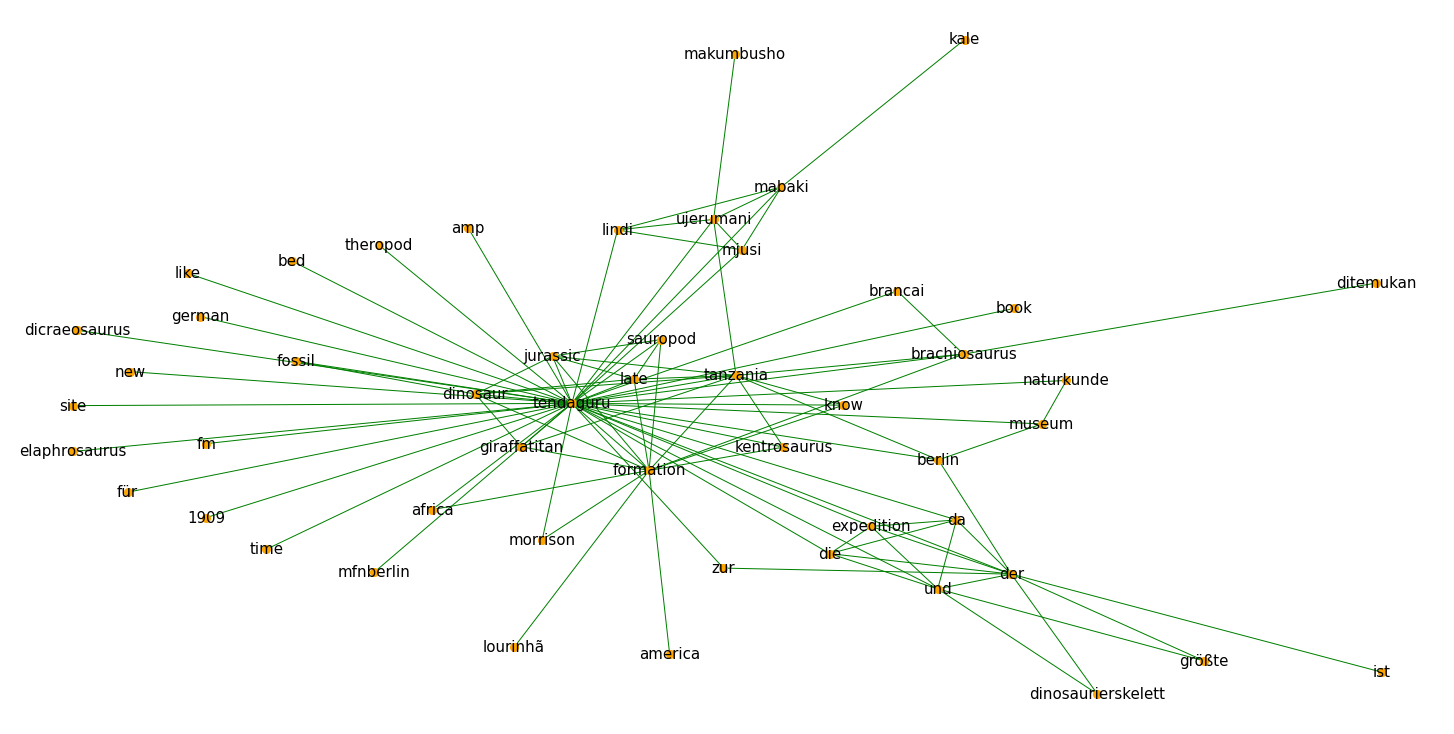

In [24]:
def network_diagram(content_col, filt_val):
    """Draws a network diagram from a given text column
    
        Args:
            :param content_col: Series of strings, column we wish to get a network of.
            :param filt_val: integer, higher numbers filters only on words that have the 
            strongest connection
    """
    
    # You can define your own parameters
    cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') 
    X = cv.fit_transform(content_col.values.astype('U'))

    # This is the matrix manipulation step
    Xc = (X.T * X) 

    # This are the entity names (i.e. keywords)
    names = cv.get_feature_names() 
    
    # create dataframe of similar names
    df_co = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

    # put df in workable format
    a = df_co.stack().reset_index()
    a.columns = ['var1', 'var2','value']

    a_filtered=a.loc[ (a['value'] > filt_val) & (a['var1'] != a['var2']) ]


    # Build your graph
    plt.figure(figsize=(20,10))

    G=nx.from_pandas_edgelist(a_filtered, 'var1', 'var2')

    # Plot the network
    nx.draw(G, with_labels=True, node_color='orange', node_size=50, edge_color='green', linewidths=2, font_size=15)

network_diagram(tendaguru_clean.clean_tweet, 10)
plt.savefig('NetworkDiagram_tendaguru.png')

## People vs mentions - CSV list, bar chart

In [25]:
import json

In [26]:
tendaguru_clean[['user','mentionedUsers']].sample(10)

,user,mentionedUsers
33,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
2,"{'_type': 'snscrape.modules.twitter.User', 'us...",None
291,"{'_type': 'snscrape.modules.twitter.User', 'us...",None
146,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
215,"{'_type': 'snscrape.modules.twitter.User', 'us...",None
73,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
194,"{'_type': 'snscrape.modules.twitter.User', 'us...",None
132,"{'_type': 'snscrape.modules.twitter.User', 'us...",None
3,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
212,"{'_type': 'snscrape.modules.twitter.User', 'us...",None


In [61]:
def mentions(mentionedUsers):
    mentions = []
    try:
        mentions = []
        for d in mentionedUsers:
            mentions.append(d['username'])
    except TypeError:
        pass
    return mentions
    

In [28]:
pd.set_option('display.max_columns', None)  

In [29]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-29-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [59]:
tendaguru_clean['username'] = tendaguru_clean.user.apply(lambda x: x['username'])

In [62]:
tendaguru_clean['mentionedUsers'] = tendaguru_clean.mentionedUsers.apply(lambda x: mentions(x))

In [63]:
tendaguru_clean[['username', 'mentionedUsers']].to_csv('../data/peopleVmentions_tendaguru.csv')

In [33]:
from collections import Counter

In [34]:
mentionList = list(tendaguru_clean['mentionedUsers'])
flat_list = [item for sublist in mentionList for item in sublist]
flat_list[:10]

['yoofilos',
 'CeraMtns',
 'CeraMtns',
 'TyrannosaurTJ',
 'EDGEinthewild',
 'MannThisguy',
 'greasydirtgrub',
 'noticebodi',
 'Mgossi',
 'MannThisguy']

In [35]:
most_mentioned = dict(Counter(flat_list).most_common(20))
most_mentioned

{'mfnberlin': 25,
 'CeraMtns': 7,
 'SerpenIllus': 5,
 'JCRev4': 4,
 'TomHoltzPaleo': 4,
 'LikesPterosaurs': 4,
 'MannThisguy': 3,
 'P2N2222A': 3,
 'YouTube': 3,
 'king_lameck': 2,
 'BrianEngh_Art': 2,
 'TanzaniaNetwork': 2,
 'SZ': 2,
 'King_Edmarka': 2,
 'ArminReindl': 2,
 'TTBTanzania': 2,
 'HKigwangalla': 2,
 'dinodadreviews': 2,
 'MarkoPalaeo': 2,
 'bajabiri': 2}

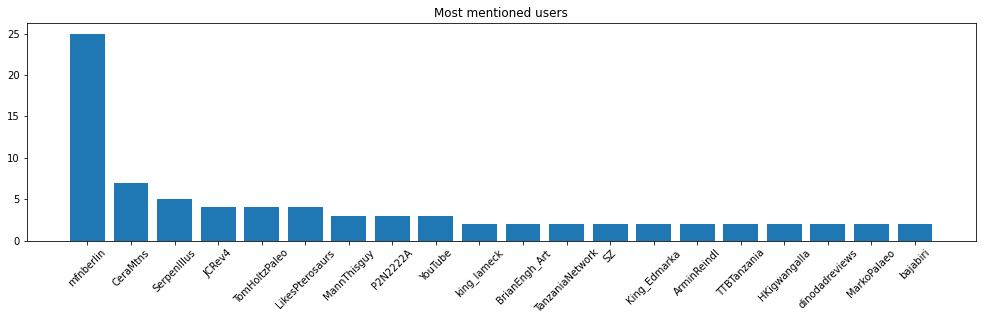

In [37]:
plt.figure(figsize=[17,4])
plt.xticks(rotation=45)
plt.title('Most mentioned users')
g = plt.bar(most_mentioned.keys(), most_mentioned.values())
ax=g
plt.savefig('MostMentioned_tendaguru.png')

## Geography - bar chart

In [4]:
tendaguru_clean.columns

Index(['Unnamed: 0', '_type', 'url', 'date', 'content', 'renderedContent',
       'id', 'user', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'clean_tweet'],
      dtype='object')

In [5]:
tendaguru_clean.coordinates is None

False

In [6]:
loc_bb = tendaguru_clean[tendaguru_clean.coordinates.isnull() == False]
print(loc_bb.shape)
print(tendaguru_clean.shape)

(6, 30)
(341, 30)


For now, we will substitute with a simple bar graph with information about the countries in our dataset.

In [41]:
loc_bb['long'] = loc_bb.coordinates.apply(lambda x:x['longitude'])
loc_bb['lat'] = loc_bb.coordinates.apply(lambda x:x['latitude'])

<ipython-input-41-a2c327c26317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_bb['long'] = loc_bb.coordinates.apply(lambda x:x['longitude'])
<ipython-input-41-a2c327c26317>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_bb['lat'] = loc_bb.coordinates.apply(lambda x:x['latitude'])


In [ ]:
# import plotly.express as px

# fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            scope="usa",
#                            labels={'unemp':'unemployment rate'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [10]:
tendaguru_clean['location'] = tendaguru_clean.user.apply(lambda x: x['location'])

In [11]:
has_loc = tendaguru_clean[tendaguru_clean.location != '']
has_loc.shape

(255, 30)

In [12]:
s1 = has_loc[has_loc.location.str.contains(',')]
s1['country'] = s1.location.apply(lambda x: x.split(', ')[-1])
s1['no_words'] = s1.country.apply(lambda x: len(x.split()))
s1 = s1[s1.no_words == 1]
s1.shape

<ipython-input-12-6d46060bb0ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['country'] = s1.location.apply(lambda x: x.split(', ')[-1])
<ipython-input-12-6d46060bb0ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['no_words'] = s1.country.apply(lambda x: len(x.split()))


(116, 32)

In [14]:
african_countries = ["Algeria",
"Angola",
"Benin",
"Botswana",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cameroon",
"Central African Republic (CAR)",
"Chad",
"Comoros",
"Congo, Democratic Republic of the",
"Congo, Republic of the",
"Cote d'Ivoire",
"Djibouti",
"Egypt",
"Equatorial Guinea",
"Eritrea",
"Eswatini (formerly Swaziland)",
"Ethiopia",
"Gabon",
"Gambia",
"Ghana",
"Guinea",
"Guinea-Bissau",
"Kenya",
"Lesotho",
"Liberia",
"Libya",
"Madagascar",
"Malawi",
"Mali",
"Mauritania",
"Mauritius",
"Morocco",
"Mozambique",
"Namibia",
"Niger",
"Nigeria",
"Rwanda",
"Sao Tome and Principe",
"Senegal",
"Seychelles",
"Sierra Leone",
"Somalia",
"South Africa",
"South Sudan",
"Sudan",
"Tanzania",
"Togo",
"Tunisia",
"Uganda",
"Zambia",
"Zimbabwe"]

In [15]:
african_countries_lower = [x.lower() for x in african_countries]

In [16]:
s1['african_vs_non_african'] = s1.country.apply(lambda x: "African" if x.lower() in african_countries_lower else "Non African")

In [21]:
import pylab as pl

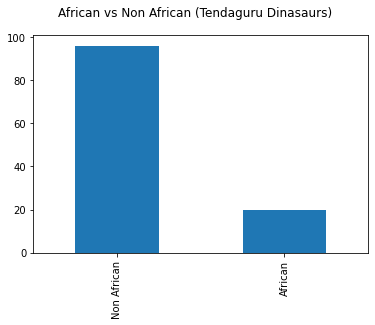

In [76]:
s1['african_vs_non_african'].value_counts().plot(kind="bar")
pl.suptitle("African vs Non African (Tendaguru Dinasaurs)")
plt.savefig('../viz_images/AfricanVSnonAfrican_tendaguru.png')

In [20]:
s1['african_vs_non_african'].value_counts()

Non African    96
African        20
Name: african_vs_non_african, dtype: int64

Origin of users that post tweets

In [77]:
s1.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'clean_tweet', 'location', 'country',
       'no_words', 'african_vs_non_african'],
      dtype='object')

In [78]:
s1.to_csv('../data/tweetGeography_tendaguru.csv')

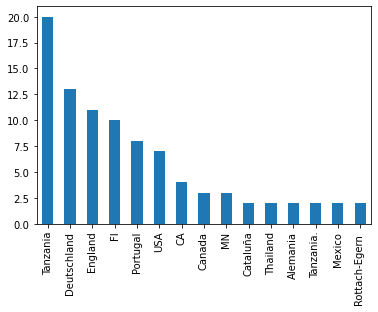

In [13]:
s1['country'].value_counts()[:15].plot(kind="bar")
plt.savefig('UserCountry_tendaguru.png')

## User + Retweets + Replies + Followers (agregation) - Top 20 influencers(diagram), all csv 

In [46]:
tendaguru_clean.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'clean_tweet', 'year', 'username',
       'location'],
      dtype='object')

In [57]:
tendaguru_clean['followersCount'] = tendaguru_clean.user.apply(lambda x: x['followersCount'])

In [64]:
topn = tendaguru_clean[['username', 'retweetCount', 'replyCount']].groupby('username').sum().sort_values('retweetCount', ascending=False).reset_index()

In [65]:
topn

,username,retweetCount,replyCount
0,SerpenIllus,307,34
1,LagerstatteJohn,237,4
2,thejohnconway,170,6
3,lifeofmanuh,117,4
4,ildarotyrannus,75,10
...,...,...,...
199,Phengarornis,0,0
200,Philoceratops,0,0
201,ProfPeterDoyle,0,0
202,ProjektUzK100,0,0


In [66]:
topInfl = pd.merge(topn, tendaguru_clean[['username', 'followersCount']], how='left', on='username').drop_duplicates().groupby('username').mean().round().reset_index().sort_values('retweetCount', ascending=False)

In [67]:
topInfl

,username,retweetCount,replyCount,followersCount
94,SerpenIllus,307,34,22768
62,LagerstatteJohn,237,4,2476
194,thejohnconway,170,6,8732
168,lifeofmanuh,117,4,847
157,ildarotyrannus,75,10,1045
...,...,...,...,...
83,Phengarornis,0,0,100
84,Philoceratops,0,0,1645
85,ProfPeterDoyle,0,0,17770
86,ProjektUzK100,0,0,719


In [52]:
topInfl.to_csv('../data/topInfluencers_tendaguru.csv')

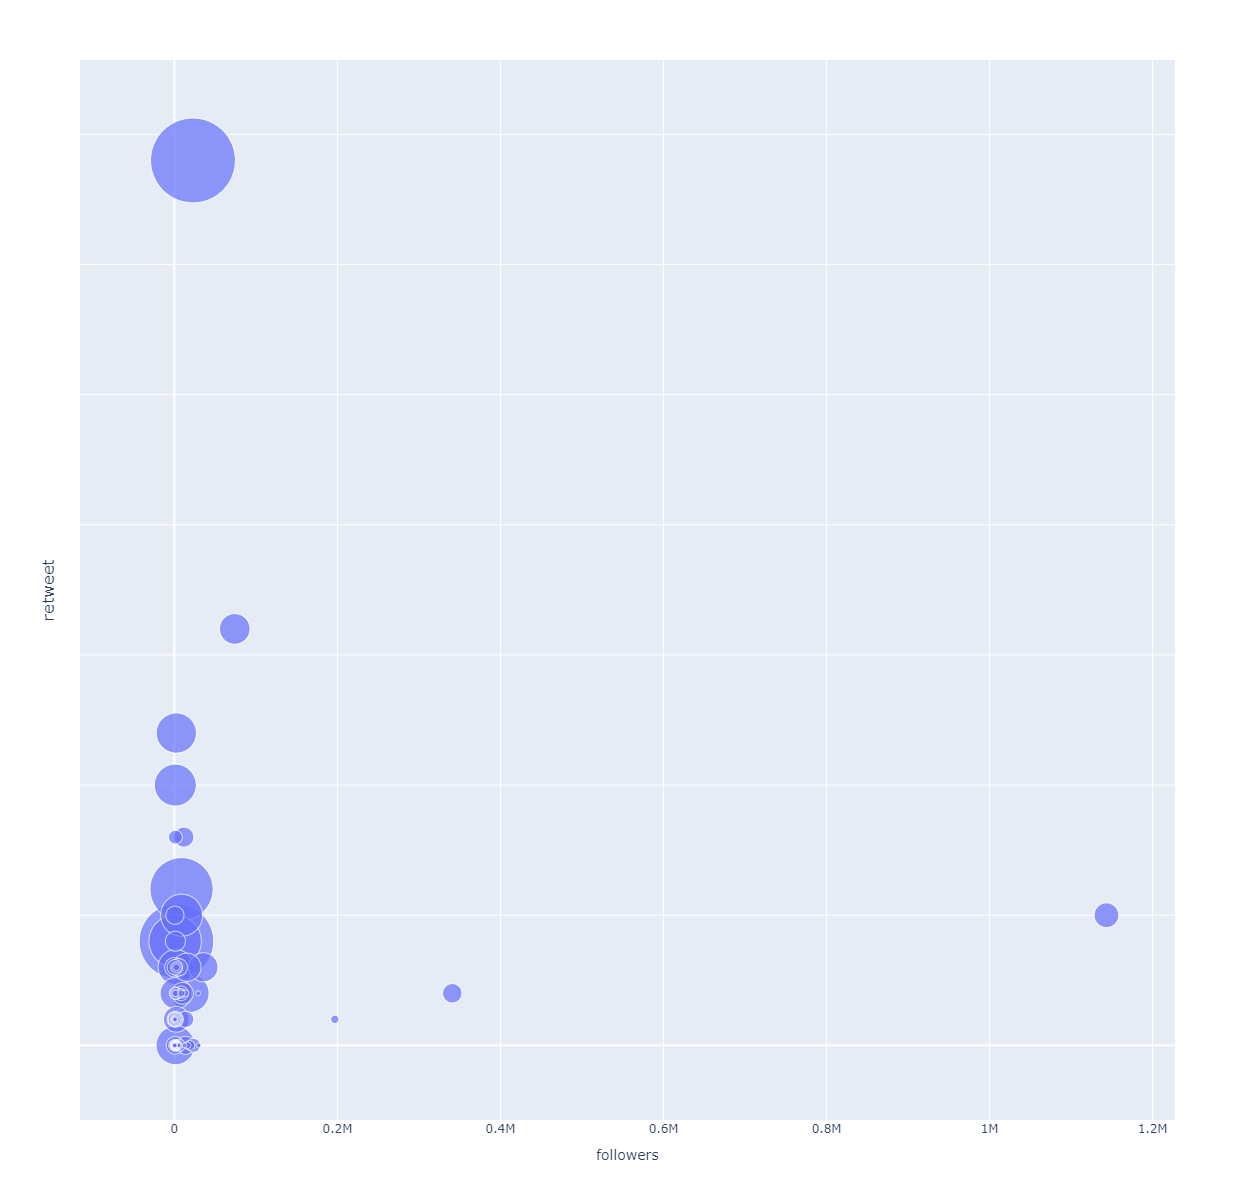

In [74]:
draw_bubble(topInfl, 'followersCount', 'replyCount', 'username', size_ = 'retweetCount',  weight = 60, height=1200, marker_size=None, xaxis= "followers", yaxis = 'retweet')
# fig.write_html("../viz_images/to/topInfluencers_tendaguru.html")

## Google News

In [23]:
tendaguru_news = pd.read_csv('../data/tendaguru_google_text_manual_clean.csv')

In [24]:
tendaguru_news.shape

(58, 7)

In [26]:
tendaguru_news.head()

,Unnamed: 0,title,link,text,html_date,text_len,lemma_text
0,0,Dinosaurs of Tendaguru - Wikipedia,https://en.wikipedia.org/wiki/Dinosaurs_of_Ten...,Dinosaurs of Tendaguru Dinosaurs of Tendaguru[...,2021-02-12,7819,dinosaur tendaguru dinosaur tendaguru1 origina...
1,1,Tendaguru Formation - Wikipedia,https://en.wikipedia.org/wiki/Tendaguru_Formation,Tendaguru Formation |Tendaguru Formation| |Typ...,2021-06-15,36692,tendaguru formation tendaguru formation typege...
2,2,Germany moves slowly on returning museum exhib...,https://www.theguardian.com/world/2018/may/17/...,Berlin’s longest-standing African is 13 metres...,2018-05-17,5660,berlin long stand african 13 metre tall carry ...
3,5,How the Berlin Natural History Museum is tackl...,https://www.berliner-zeitung.de/en/how-the-ber...,Berlin - Who are the rightful owners of the di...,2021-04-27,10423,berlin rightful owner dinosaur remains natural...
4,6,Dinosaurs of Tendaguru - NiNa.Az,http://wikipedia.us.nina.az/wiki/Dinosaurs_of_...,Dinosaurs of Tendaguru NiNa.Az NiNa.Az » Free ...,2019-09-24,13918,dinosaur tendaguru ninaaz ninaaz » free servic...


In [27]:
withDate = tendaguru_news.dropna()

In [29]:
withDate['year'] = withDate.html_date.apply(lambda x:x[:4])

<ipython-input-29-27dfb6e1900f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withDate['year'] = withDate.html_date.apply(lambda x:x[:4])


In [56]:
withDate.groupby('year').count()

,Unnamed: 0,title,link,text,html_date,text_len,lemma_text
year,,,,,,,
1995,2,2,2,2,2,2,2
2012,1,1,1,1,1,1,1
2013,1,1,1,1,1,1,1
2016,1,1,1,1,1,1,1
2017,2,2,2,2,2,2,2
2018,3,3,3,3,3,3,3
2019,10,10,10,10,10,10,10
2020,10,10,10,10,10,10,10
2021,23,23,23,23,23,23,23


In [37]:
import pylab as pl

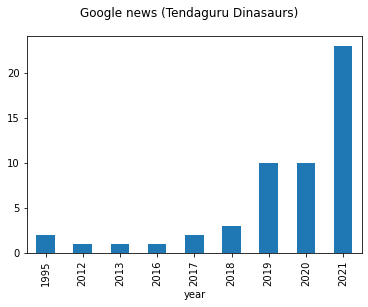

In [79]:
withDate.groupby('year').count()['title'].plot(kind="bar")
pl.suptitle("Google news (Tendaguru Dinasaurs)")
plt.savefig('../viz_images/GoogleNews_tendaguru.png')

## Emotion Bar

In [33]:
tendaguru_news = ct.clean_tweets(tendaguru_news,content='text',col_name='clean_text',
                general_clean=True,lemma=True,stem=False,remove_tag=True,remove_mention=True,
                remove_emoji=False, remove_stopword=True,min_length=2, untokenized_return=True
                )

time taken to clean tweets: 38.16046977043152s. Use the [clean_text] column to perform your analysis/modeling on


In [34]:
import text2emotion as te

[nltk_data] Downloading package stopwords to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
tendaguru_news["emotion_dict"] = tendaguru_news['clean_text'].apply(lambda x: te.get_emotion(x))

In [40]:
from collections import Counter

In [41]:
tendaguru_news['emotion_counter'] = tendaguru_news['emotion_dict'].apply(lambda x: Counter(x))

In [42]:
def normalize(d, target=100):
   raw = sum(d.values())
   factor = target/raw
   return {key:value*factor for key,value in d.items()}

In [43]:
gg_emo_dict = normalize(tendaguru_news['emotion_counter'].sum())

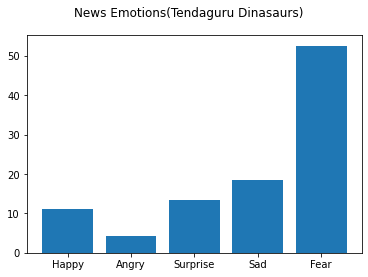

In [80]:
plt.bar(gg_emo_dict.keys(), gg_emo_dict.values())
pl.suptitle("News Emotions(Tendaguru Dinasaurs)")
plt.savefig('../viz_images/newsEmotions_tendaguru.png')

In [45]:
tendaguru_news.head()

,Unnamed: 0,title,link,text,html_date,text_len,lemma_text,clean_text,emotion_dict,emotion_counter
0,0,Dinosaurs of Tendaguru - Wikipedia,https://en.wikipedia.org/wiki/Dinosaurs_of_Ten...,Dinosaurs of Tendaguru Dinosaurs of Tendaguru[...,2021-02-12,7819,dinosaur tendaguru dinosaur tendaguru1 origina...,dinosaur tendaguru dinosaur tendaguru1 origina...,"{'Happy': 0.11, 'Angry': 0.04, 'Surprise': 0.1...","{'Happy': 0.11, 'Angry': 0.04, 'Surprise': 0.1..."
1,1,Tendaguru Formation - Wikipedia,https://en.wikipedia.org/wiki/Tendaguru_Formation,Tendaguru Formation |Tendaguru Formation| |Typ...,2021-06-15,36692,tendaguru formation tendaguru formation typege...,tendaguru formation tendaguru formation typege...,"{'Happy': 0.08, 'Angry': 0.05, 'Surprise': 0.1...","{'Happy': 0.08, 'Angry': 0.05, 'Surprise': 0.1..."
2,2,Germany moves slowly on returning museum exhib...,https://www.theguardian.com/world/2018/may/17/...,Berlin’s longest-standing African is 13 metres...,2018-05-17,5660,berlin long stand african 13 metre tall carry ...,berlin long stand african 13 metre tall carry ...,"{'Happy': 0.08, 'Angry': 0.01, 'Surprise': 0.2...","{'Happy': 0.08, 'Angry': 0.01, 'Surprise': 0.2..."
3,5,How the Berlin Natural History Museum is tackl...,https://www.berliner-zeitung.de/en/how-the-ber...,Berlin - Who are the rightful owners of the di...,2021-04-27,10423,berlin rightful owner dinosaur remains natural...,berlin rightful owner dinosaur remains natural...,"{'Happy': 0.1, 'Angry': 0.04, 'Surprise': 0.16...","{'Happy': 0.1, 'Angry': 0.04, 'Surprise': 0.16..."
4,6,Dinosaurs of Tendaguru - NiNa.Az,http://wikipedia.us.nina.az/wiki/Dinosaurs_of_...,Dinosaurs of Tendaguru NiNa.Az NiNa.Az » Free ...,2019-09-24,13918,dinosaur tendaguru ninaaz ninaaz » free servic...,dinosaur tendaguru ninaaz ninaaz » free servic...,"{'Happy': 0.14, 'Angry': 0.02, 'Surprise': 0.1...","{'Happy': 0.14, 'Angry': 0.02, 'Surprise': 0.1..."


In [55]:
max(tendaguru_news.iloc[0]['emotion_counter'].values())

0.54